# CPSC 481 - Artificial Intelligence - Project

# Machine Learning in the stock market

by Nils Heimbach

CWID: 885179317

E-Mail: heimbachnils@csu.fullerton.edu

_______________________
#### Table of content: <a class="TOC" id="TOC"></a>

0. [Pre-Settings](#0)
1. [Importing data](#1)
2. [Data Understanding](#2)
3. [Data Preparation](#3)
4. [Data Modeling & Evaluation ](#4)
5. [Data Evaluation and Analysis](#5)
6. [Conclusion](#6)

## 0. Pre-Settings <a class="0" id="0"></a>

In [149]:
import warnings
warnings.filterwarnings("ignore")

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [151]:
# path configuration (change "path_to_dir" to the main directory): 
path_to_dir = R"C:\Users\heimb\Documents\GitHub\CPSC481_AI_Project"

path_to_input = path_to_dir+"\Data\Input"
path_to_output = path_to_dir+"\Data\Output"
path_to_code = path_to_dir+"\Code"

# Choose Stock: 
stock = "AAPL"

# Choose start time for downloaded data:
start = "2020-01-01"

In [152]:
# Expanding the directory with the "Code" directory 
import sys
sys.path.insert(0, path_to_dir+"\Code")

[Click here to go to the top of the chapter](#0)

[Click here for the table of content](#TOC)

## 1. Importing data <a class="1" id="1"></a>

In [153]:
import yfinance as yf

In [154]:
# download stock into dataframe
df = yf.download(stock,start=start)
# save dataframe into .csv
df.to_pickle(path_to_input+"\\"+stock+"_stock_data_since_"+start+".pkl")
# show dataframe
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.561539,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.846367,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.426834,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,73.081497,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,74.257118,132079200
...,...,...,...,...,...,...
2022-12-06,147.070007,147.300003,141.919998,142.910004,142.910004,64727200
2022-12-07,142.190002,143.369995,140.000000,140.940002,140.940002,69721100
2022-12-08,142.360001,143.520004,141.100006,142.649994,142.649994,62128300


[Click here to go to the top of the chapter](#1)

[Click here for the table of content](#TOC)

## 2. Data Understanding <a class="2" id="2"></a>

In [155]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.561539,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.846367,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.426834,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,73.081497,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,74.257118,132079200
...,...,...,...,...,...,...
2022-12-06,147.070007,147.300003,141.919998,142.910004,142.910004,64727200
2022-12-07,142.190002,143.369995,140.000000,140.940002,140.940002,69721100
2022-12-08,142.360001,143.520004,141.100006,142.649994,142.649994,62128300


In [156]:
df.shape

(743, 6)

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 743 entries, 2020-01-02 to 2022-12-12
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       743 non-null    float64
 1   High       743 non-null    float64
 2   Low        743 non-null    float64
 3   Close      743 non-null    float64
 4   Adj Close  743 non-null    float64
 5   Volume     743 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 40.6 KB


In [158]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,743.000000,743.000000,743.000000,743.000000,743.000000,7.430000e+02
mean,130.148775,131.816619,128.551975,130.250633,129.207284,1.125361e+08
std,30.845273,31.094587,30.539905,30.821853,31.070790,5.633048e+07
min,57.020000,57.125000,53.152500,56.092499,55.082985,3.519590e+07
25%,115.550003,116.965000,113.945000,115.450001,113.888340,7.635050e+07
50%,136.029999,137.339996,134.110001,135.869995,135.018158,9.581140e+07
75%,150.510002,152.184998,149.139999,150.885002,150.398438,1.299476e+08
max,182.630005,182.940002,179.119995,182.009995,180.959732,4.265100e+08


In [159]:
from own_functions import insights_of_df

insights_of_df(df)

,colName,non-null values,null values,percentNA,unique,dtype
0,Open,743,0,0.0,717,float64
1,High,743,0,0.0,711,float64
2,Low,743,0,0.0,716,float64
3,Close,743,0,0.0,714,float64
4,Adj Close,743,0,0.0,734,float64
5,Volume,743,0,0.0,741,int64


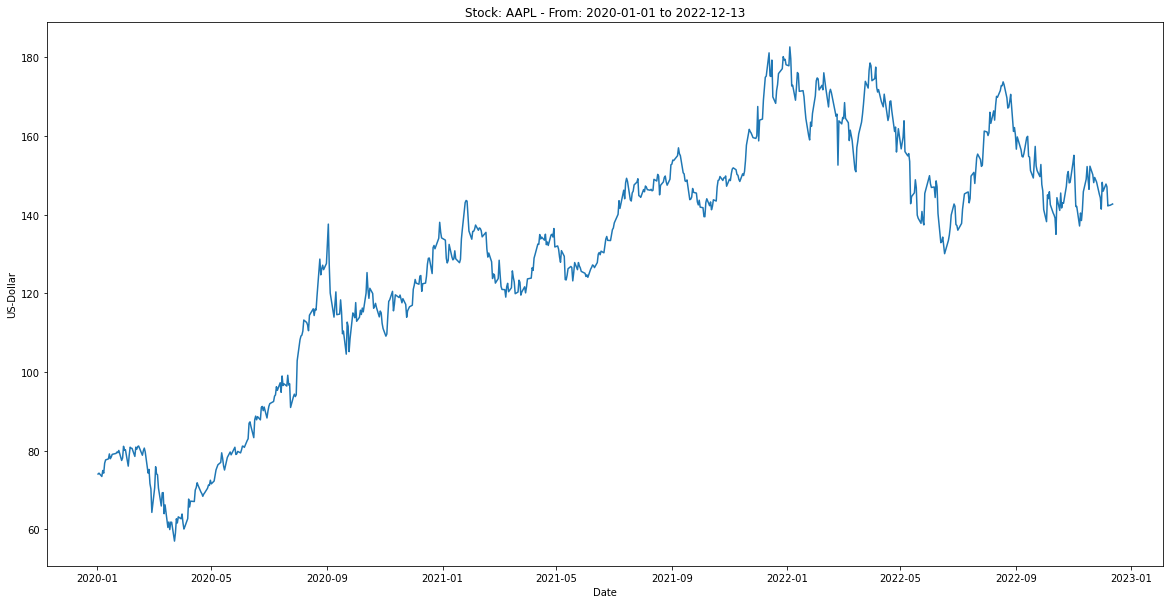

In [160]:
from datetime import date
today = str(date.today())

plt.figure(figsize=(20,10))
plt.plot(df.index, df.Open)
plt.title("Stock: "+stock+" - From: "+start+" to "+today)
plt.ylabel("US-Dollar")
plt.xlabel("Date")

plt.savefig(path_to_output+"\\Stock course of "+stock+" "+start+".png")

plt.show()

[Click here to go to the top of the chapter](#2)

[Click here for the table of content](#TOC)

## 3. Data Preparation <a class="3" id="3"></a>

In [161]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.561539,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.846367,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.426834,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,73.081497,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,74.257118,132079200
...,...,...,...,...,...,...
2022-12-06,147.070007,147.300003,141.919998,142.910004,142.910004,64727200
2022-12-07,142.190002,143.369995,140.000000,140.940002,140.940002,69721100
2022-12-08,142.360001,143.520004,141.100006,142.649994,142.649994,62128300


In [162]:
# Adding return column as target value

df["Return"] = (df["Close"]-df["Open"])/df["Open"]

df

,Open,High,Low,Close,Adj Close,Volume,Return
Date,,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.561539,135480400,0.013874
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.846367,146322800,0.000942
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.426834,118387200,0.020457
2020-01-07,74.959999,75.224998,74.370003,74.597504,73.081497,108872000,-0.004836
2020-01-08,74.290001,76.110001,74.290001,75.797501,74.257118,132079200,0.020292
...,...,...,...,...,...,...,...
2022-12-06,147.070007,147.300003,141.919998,142.910004,142.910004,64727200,-0.028286
2022-12-07,142.190002,143.369995,140.000000,140.940002,140.940002,69721100,-0.008791
2022-12-08,142.360001,143.520004,141.100006,142.649994,142.649994,62128300,0.002037


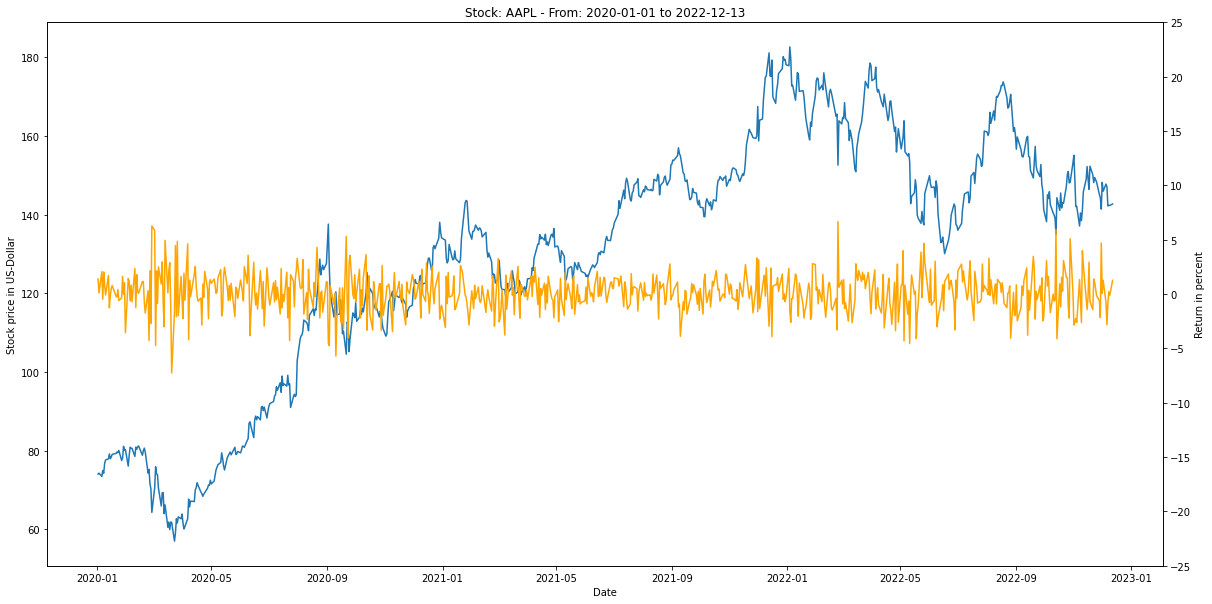

In [163]:
# visualize return and stock course
today = str(date.today())

fig, ax = plt.subplots(figsize=(20,10))
ax.plot(df.index, df.Open)
ax.set_title("Stock: "+stock+" - From: "+start+" to "+today)
ax.set_ylabel("Stock price in US-Dollar")
ax.set_xlabel("Date")

ax2 = ax.twinx()
ax2.plot(df.index, df.Return*100, color ="orange")
ax2.set_ylabel("Return in percent")
ax2.set_yticks([-25,-20,-15,-10,-5,0,5,10,15,20,25])

plt.savefig(path_to_output+"\\Stock course and return in percent of "+stock+" "+start+".png")

plt.show()

In [164]:
df.iloc[:,:-1]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.561539,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.846367,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.426834,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,73.081497,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,74.257118,132079200
...,...,...,...,...,...,...
2022-12-06,147.070007,147.300003,141.919998,142.910004,142.910004,64727200
2022-12-07,142.190002,143.369995,140.000000,140.940002,140.940002,69721100
2022-12-08,142.360001,143.520004,141.100006,142.649994,142.649994,62128300


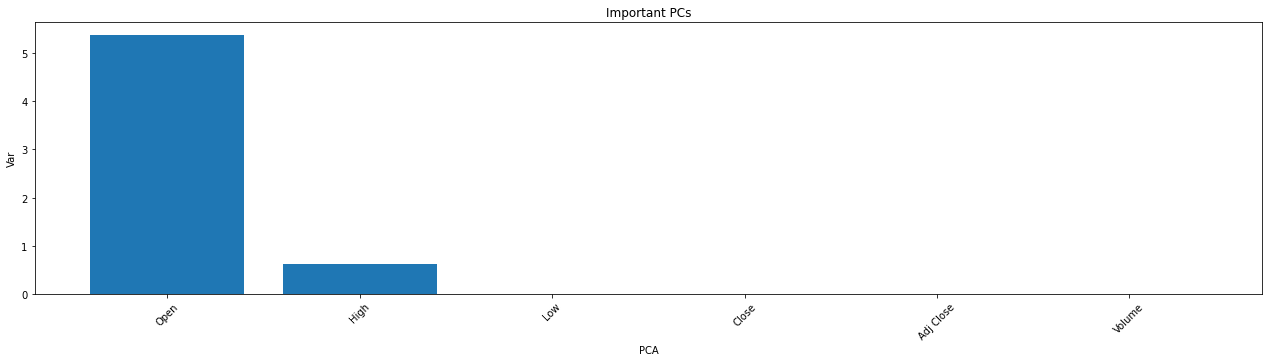

In [165]:
# PCA
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = df.iloc[:, :-1]
scaler = StandardScaler()
pca = PCA()
pipeline = make_pipeline(scaler, pca)
pipeline.fit(X)

# Plot a bar chart describing the variance of each feature
features = range(pca.n_components_)
features2 = X.columns

# Define bar chart size
_ = plt.figure(figsize=(22, 5))

# Define actual bar chart
_ = plt.bar(features2, pca.explained_variance_)

# Labels, Titles und Ticks of the bar chart 
_ = plt.xlabel('PCA')
_ = plt.ylabel('Var')
_ = plt.xticks(features2, rotation=45)
_ = plt.title("Important PCs")

# Display the bar chart
plt.show()

In [166]:
# splitting df into descriptive (x) and target (y) features

x = df.iloc[:,:-1]
y = df.iloc[:,-1:]

# manually splitting "x" and "y" into train and test data (see "train_test_split" below for distribution)
train_test_split = 0.7

amt_rows = x.shape[0]
split = round(amt_rows*train_test_split)

x_test = x.iloc[split:,:]
x_train = x.iloc[:split,:]

y_test = y.iloc[split:,:]
y_train = y.iloc[:split,:]

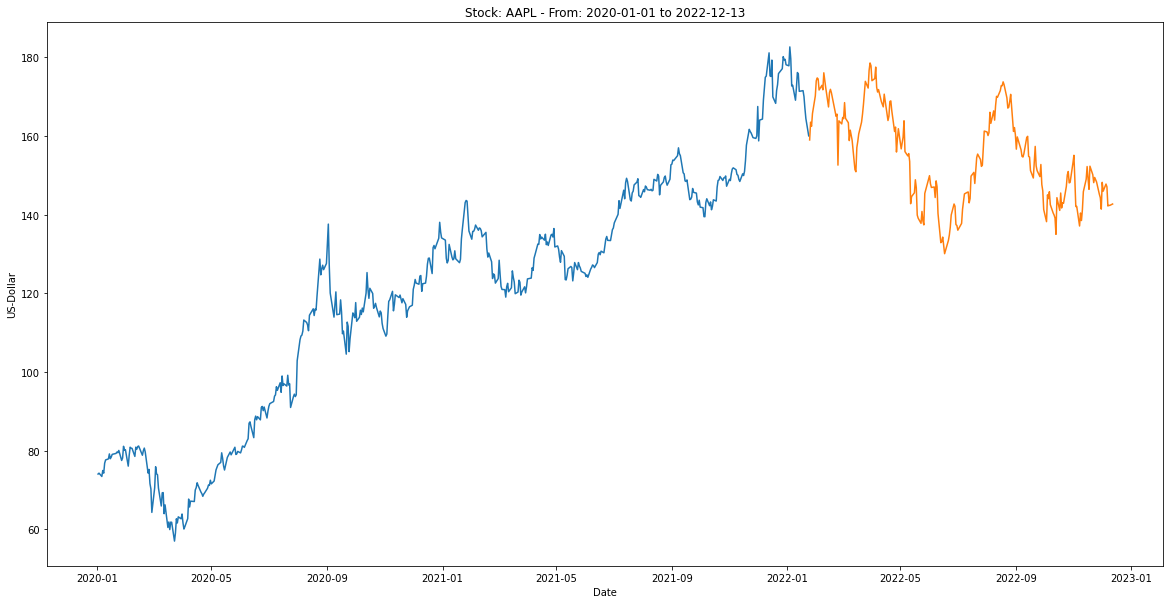

In [167]:
from datetime import date
today = str(date.today())

plt.figure(figsize=(20,10))
plt.plot(x_train.index, x_train.Open)
plt.plot(x_test.index, x_test.Open)

plt.title("Stock: "+stock+" - From: "+start+" to "+today)
plt.ylabel("US-Dollar")
plt.xlabel("Date")

plt.savefig(path_to_output+"\\Test train split of "+stock+" "+start+".png")

plt.show()

[Click here to go to the top of the chapter](#3)

[Click here for the table of content](#TOC)

## 4. Data Modeling & Evaluation <a class="4" id="4"></a>

In [168]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import TheilSenRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.ensemble import RandomForestRegressor

model_dict = {"LinR":LinearRegression, "HR":HuberRegressor,
              "Ridge":Ridge, "Elastic":ElasticNet,
              "Lasso":Lasso, "TheilSenRegressor":TheilSenRegressor,
              "RANSACRegressor": RANSACRegressor, "RandomForestRegressor": RandomForestRegressor}

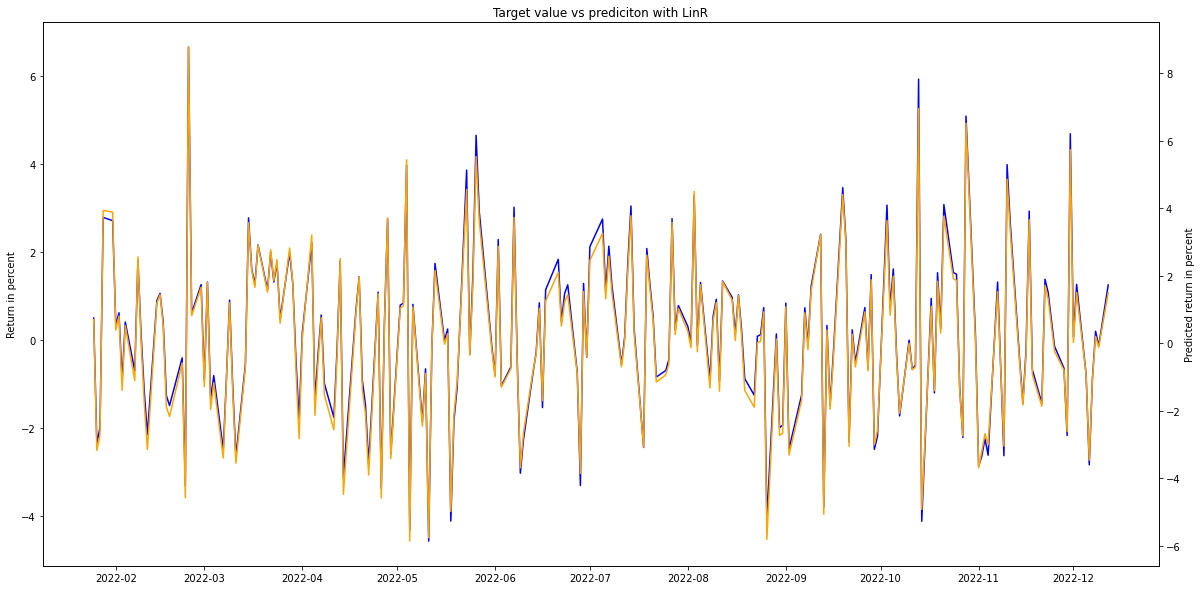

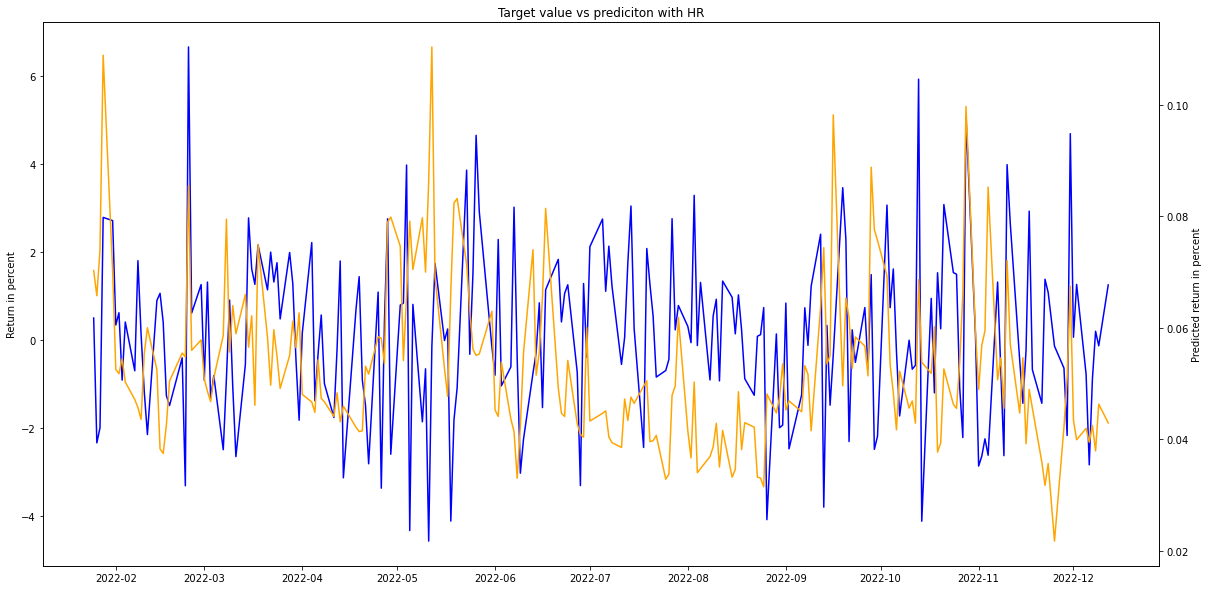

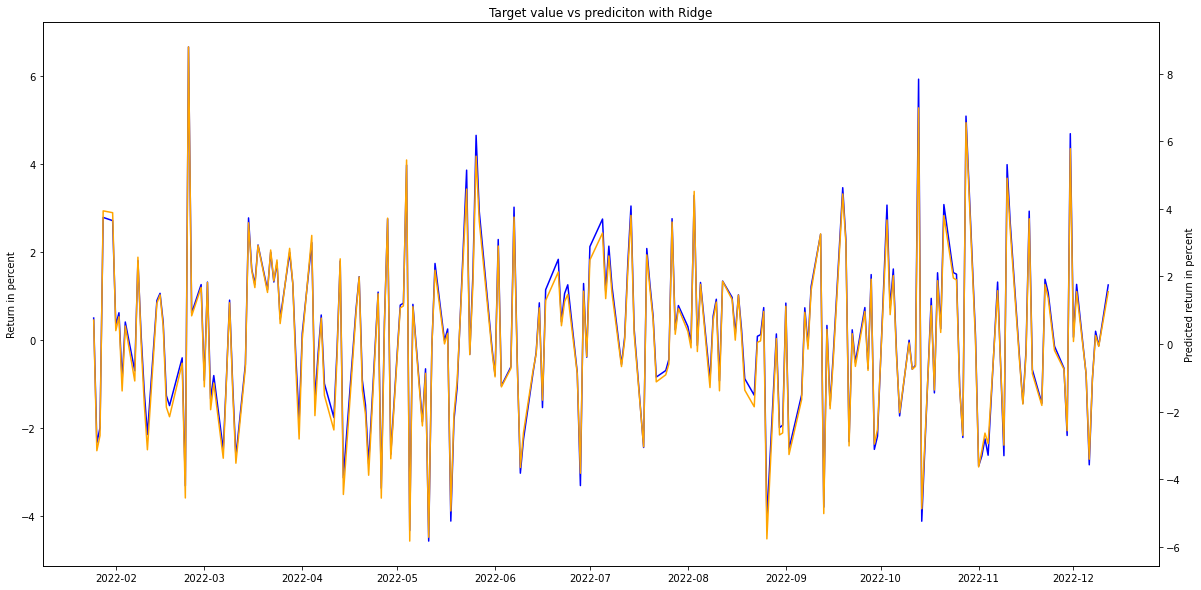

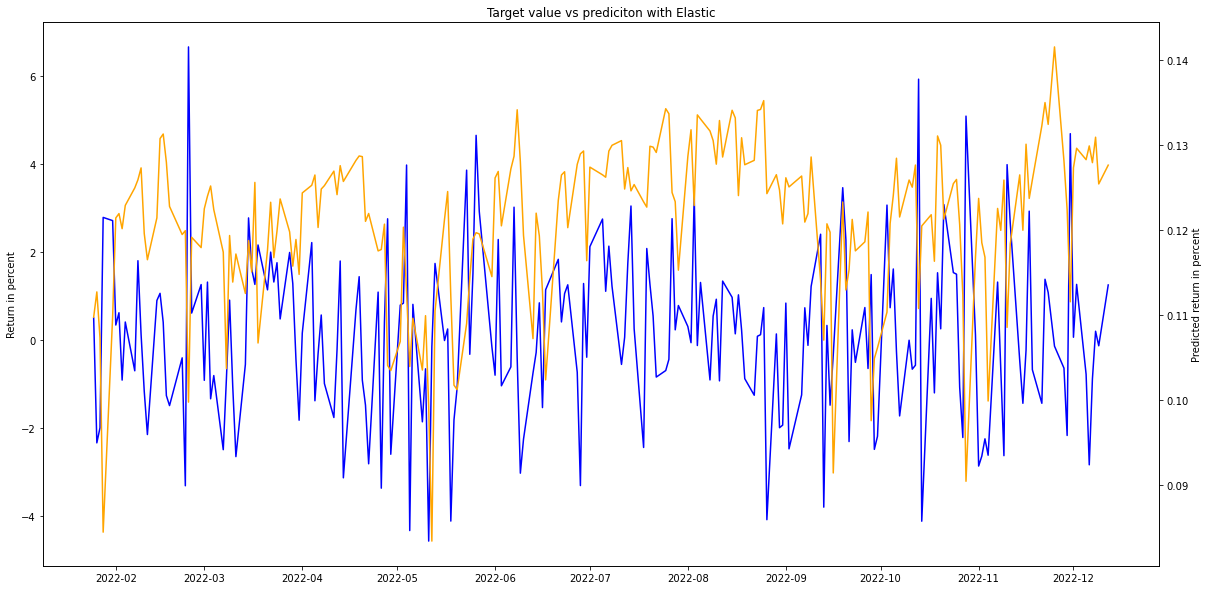

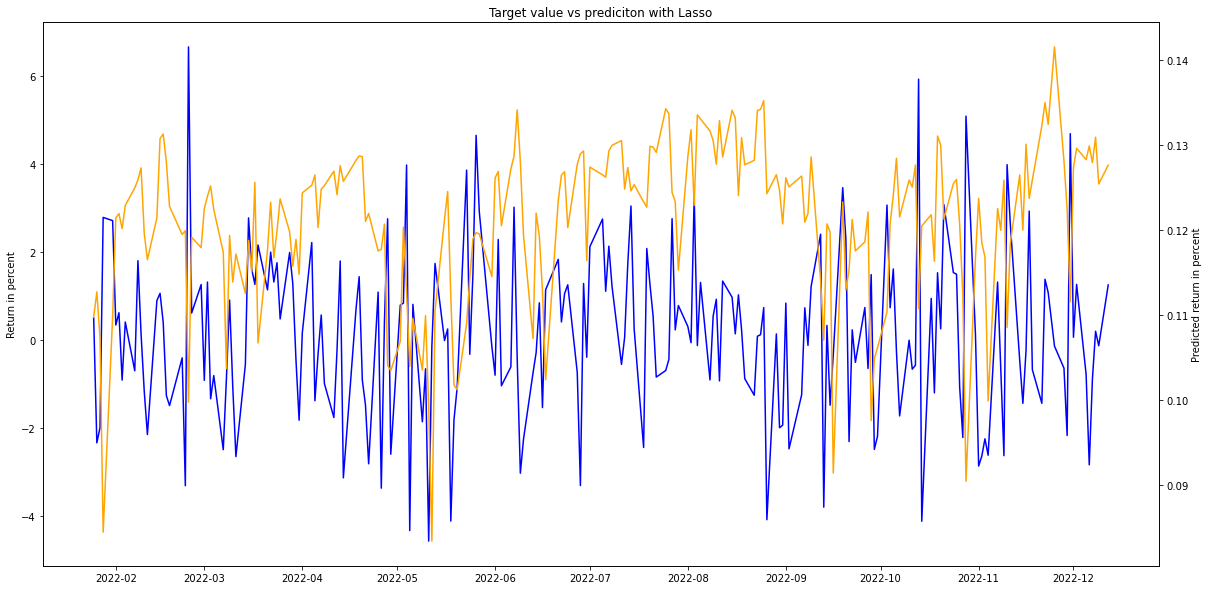

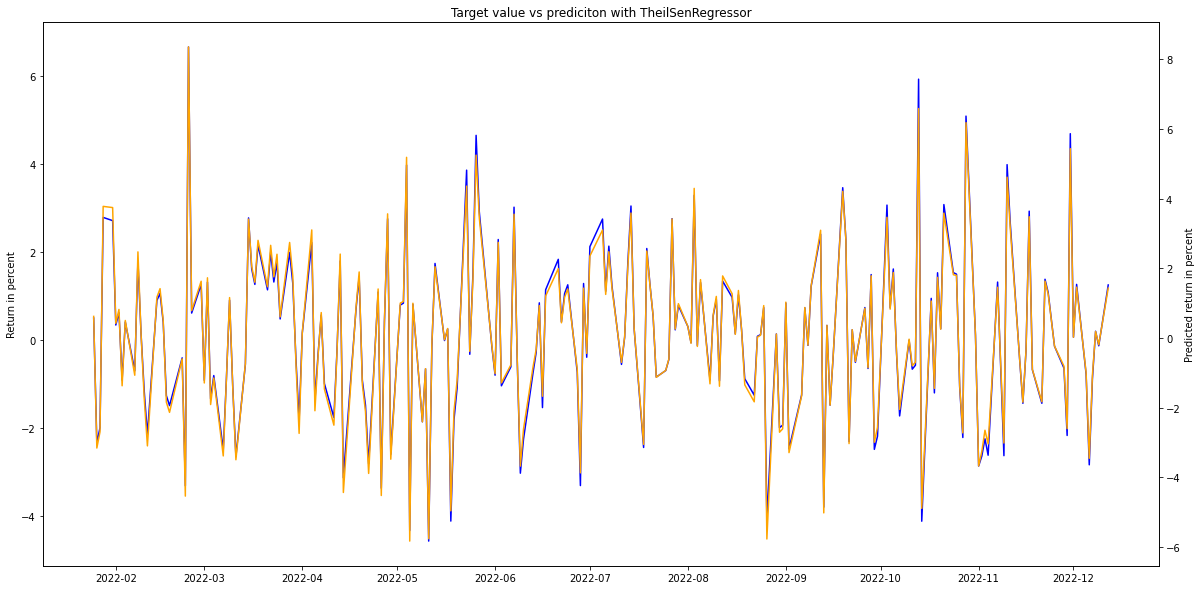

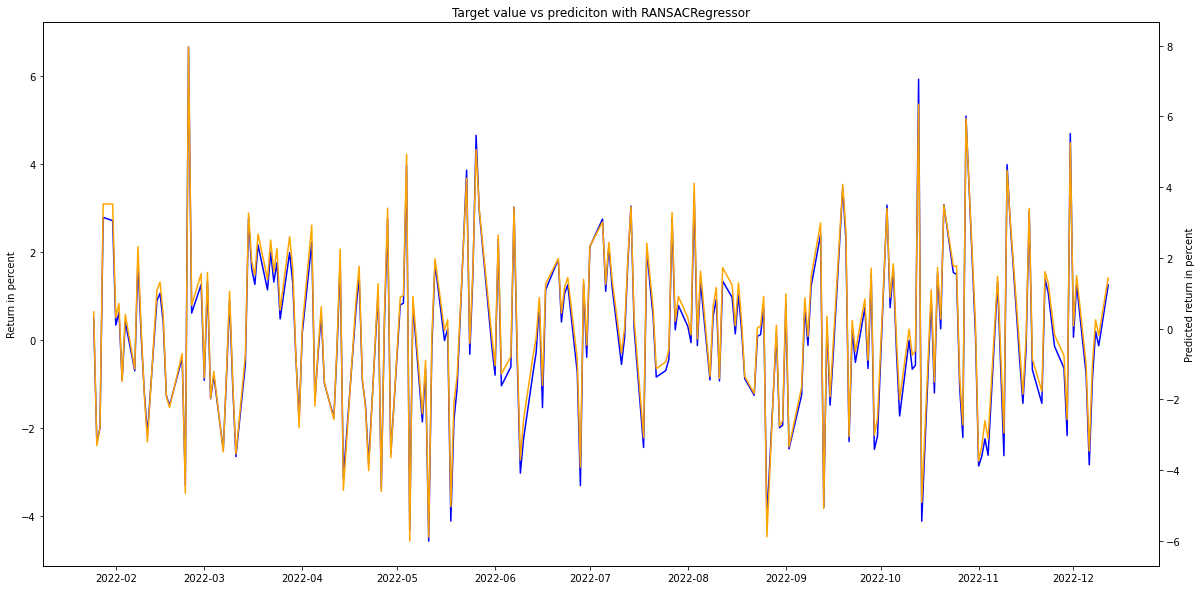

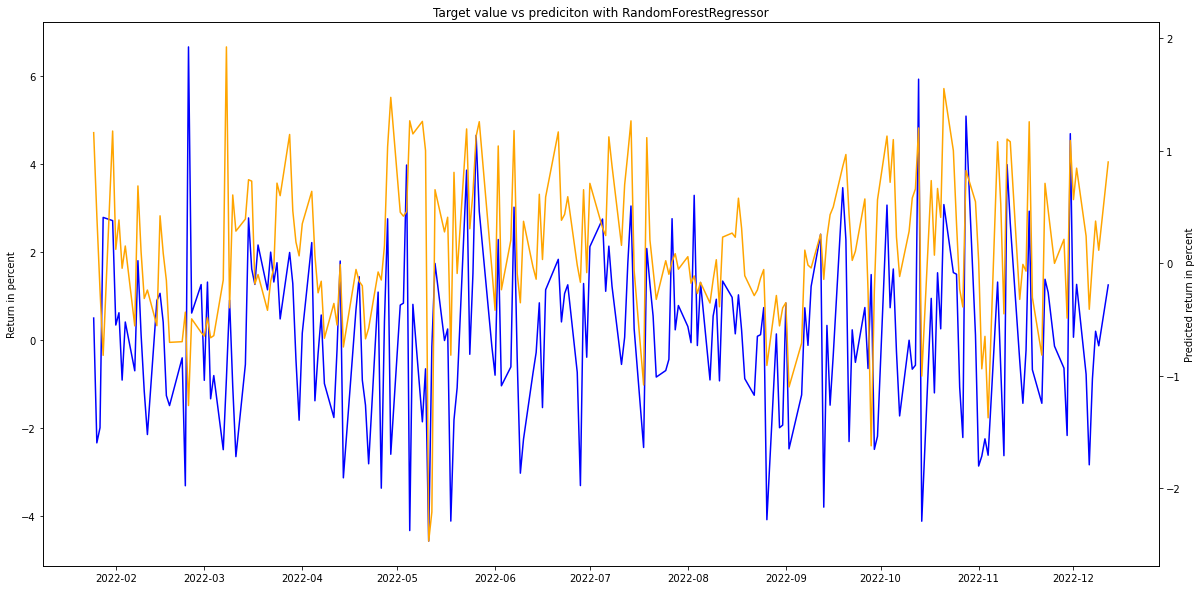

In [169]:
from own_functions import regression_metrics

df_scores = pd.DataFrame(columns=["Name","R2", "MSE", "RMSE", "MAE"])
y_test_copy = y_test.copy()

for key, value in model_dict.items(): 

    #defining model
    model = value()
    
    # training
    model.fit(x_train,y_train)
    # predicting train set
    y_pred_train = model.predict(x_train)
    # calculating regression metrics
    mae, mse, rmse, r2 = regression_metrics(y_train, y_pred_train)
    # adding model and metrics to df
    train_dict = {"Name":key+"_train","R2":r2, "MSE":mse, "RMSE":rmse, "MAE":mae}
    df_scores = df_scores.append(train_dict, ignore_index=True)
    
    # testing
    y_pred_test = model.predict(x_test)
    # calculating regression metrics
    mae, mse, rmse, r2 = regression_metrics(y_test, y_pred_test)
    # adding model and metrics to df
    train_dict = {"Name":key+"_test","R2":r2, "MSE":mse, "RMSE":rmse, "MAE":mae}
    df_scores = df_scores.append(train_dict, ignore_index=True)
    
    # adding target predicitons to a copy of y_test df
    y_test_copy[key+"_predictions"] = y_pred_test
    
    # visualization of predictions
    fig, ax = plt.subplots(figsize=(20,10))
    ax.plot(y_test.index, y_test.Return*100, color ="blue")
    ax.set_title("Target value vs prediciton with "+ key)
    ax.set_ylabel("Return in percent")

    ax2 = ax.twinx()
    ax2.plot(y_test.index, y_test_copy[key+"_predictions"]*100, color ="orange")
    ax2.set_ylabel("Predicted return in percent")
    
    plt.savefig(path_to_output+"\\Predictions\Return vs predicted return " + key +" on stock "+stock+" "+start+".png")
    
    plt.show()
    
    

In [170]:
df_scores

,Name,R2,MSE,RMSE,MAE
0,LinR_train,0.914008,0.000025,0.004954,0.002884
1,LinR_test,0.910351,0.000033,0.00571,0.004391
2,HR_train,-0.001506,0.000286,0.016907,0.012742
3,HR_test,-0.000819,0.000364,0.019077,0.0149
4,Ridge_train,0.913985,0.000025,0.004955,0.002877
5,Ridge_test,0.911019,0.000032,0.005688,0.004364
6,Elastic_train,0.000212,0.000285,0.016893,0.012748
7,Elastic_test,-0.00026,0.000364,0.019072,0.014864
8,Lasso_train,0.000212,0.000285,0.016893,0.012748
9,Lasso_test,-0.00026,0.000364,0.019072,0.014864


In [171]:
# saving score df 
df_scores.to_csv(path_to_output+"\ML_scores_"+stock+"_"+start+".csv")

[Click here to go to the top of the chapter](#4)

[Click here for the table of content](#TOC)